Import package

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split # 数据切割
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # 画图工具
from sklearn.model_selection import train_test_split # 数据切割
from sklearn.linear_model import BayesianRidge, LinearRegression, ElasticNet  # 批量导入要实现的回归算法
from sklearn.ensemble import GradientBoostingRegressor  # 集成算法
from sklearn.svm import SVR  # SVR
from sklearn.model_selection import cross_val_score  # 交叉检验
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  # 批量导入指标算法

Install and Load Data

In [10]:
def get(tickers, startdate, enddate):
    def data(ticker):
        return (yf.download(ticker, start=startdate, end=enddate))
    datas = map (data, tickers)
    return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))
tickers = ['AAPL', 'MSFT']
all_data = get(tickers, datetime.datetime(2020, 11, 1), datetime.datetime(2021, 1, 1))
all_data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
Ticker Date                                                                     
AAPL   2020-11-02  109.110001  110.680000  107.320000  108.769997  106.983109   
       2020-11-03  109.660004  111.489998  108.730003  110.440002  108.625679   
       2020-11-04  114.139999  115.589996  112.349998  114.949997  113.061584   
       2020-11-05  117.949997  119.620003  116.870003  119.029999  117.074562   
       2020-11-06  118.320000  119.199997  116.129997  118.690002  116.941566   
...                       ...         ...         ...         ...         ...   
MSFT   2020-12-24  221.419998  223.610001  221.199997  222.750000  217.824768   
       2020-12-28  224.449997  226.029999  223.020004  224.960007  219.985931   
       2020-12-29  226.309998  227.179993  223.580002  224.149994  219.193787   
       2020-12-30  225.229996  225.630005  221.470001  221.679993  216.778412   
       2020-12-31  221.699997  223.000000  219.679993  222.419998  217.502045   

                      Volume  
Ticker Date                   
AAPL   2020-11-02  122866900  
       2020-11-03  107624400  
       2020-11-04  138235500  
       2020-11-05  126387100  
       2020-11-06  114457900  
...                      ...  
MSFT   2020-12-24   10550600  
       2020-12-28   17933500  
       2020-12-29   17403200  
       2020-12-30   20272300  
       2020-12-31   20942100  

[84 rows x 6 columns]

In [11]:
all_data.to_csv('data.csv')

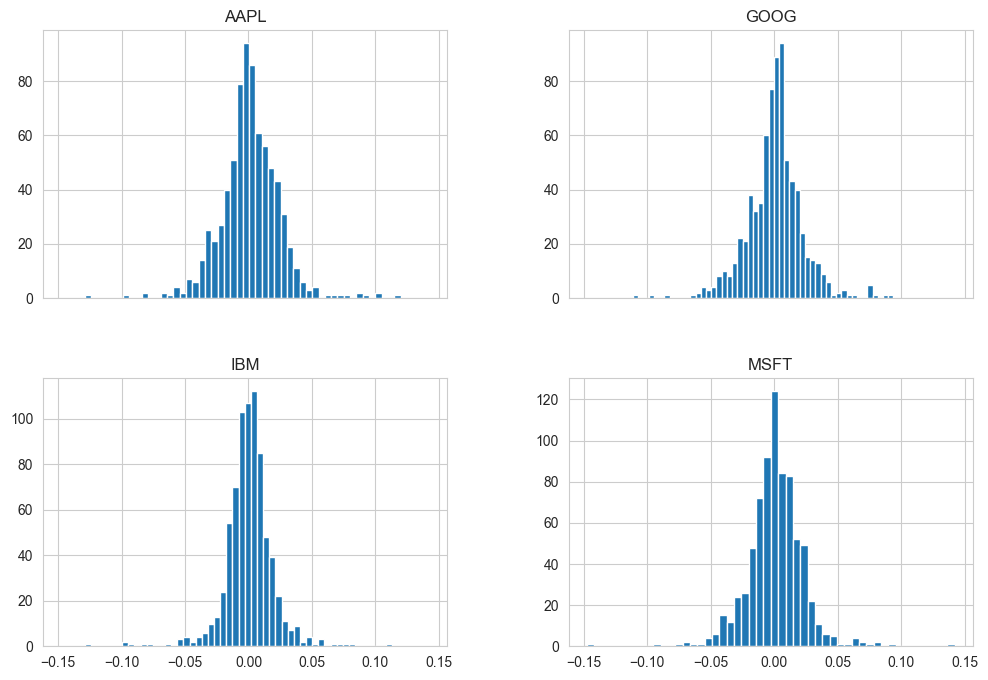

In [10]:
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')

# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

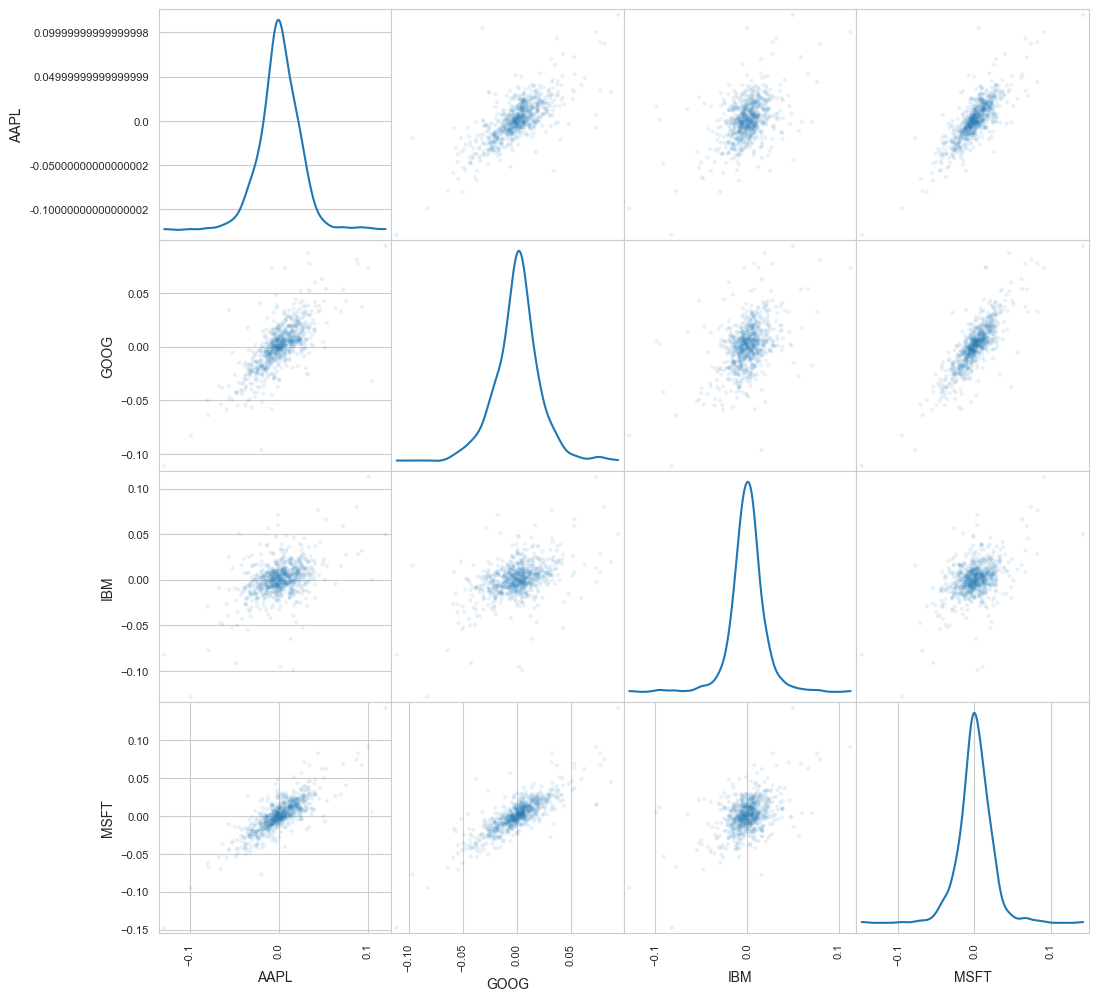

In [11]:
# Plot a scatter matrix with the `daily_pct_change` data
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

In [27]:
aapl = yf.download('AAPL', start="2020-01-01", end="2023-01-01") 
aapl['Time'] = np.arange(len(aapl.index))
aapl
# Splitting the data set into a training and test set
X = aapl['Time']
y = aapl['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print( f'The length of training data and test data are {len(df_X_train)} and {len(df_X_test)}')
X_train

[*********************100%***********************]  1 of 1 completed
The length of training data and test data are 567 and 189


Date
2022-04-08    572
2020-02-24     35
2022-01-21    518
2020-12-15    241
2021-08-04    400
             ... 
2022-10-21    707
2020-10-06    192
2022-07-01    629
2022-03-22    559
2022-09-20    684
Name: Time, Length: 567, dtype: int64

In [28]:
# print('='*20+"回归实验"+'='*20)
# # 查看总样本量、总特征数
# n_samples,n_features=X_train.shape
# print('{:-^60}'.format('样本数据审查'))
# print('样本量: {0} | 特征数: {1}'.format(n_samples,n_features))

# 训练回归模型
n_folds = 6  # 设置交叉检验的次数
model_br = BayesianRidge()  # 建立贝叶斯岭回归模型对象
model_lr = LinearRegression()  # 建立普通线性回归模型对象
model_etc = ElasticNet()  # 建立弹性网络回归模型对象
model_svr = SVR()  # 建立支持向量回归模型对象
model_gbr = GradientBoostingRegressor()  # 建立梯度增强回归模型对象
model_names = ['BayesianRidge', 'LinearRegression', 'ElasticNet', 'SVR', 'GBR']  # 不同模型的名称列表
model_dic = [model_br, model_lr, model_etc, model_svr, model_gbr]  # 不同回归模型对象的集合

cv_score_list = []  # 交叉检验结果列表
pre_y_list = []  # 各个回归模型预测的y值列表
for model in model_dic:  # 读出每个回归模型对象
    scores = cross_val_score(model, X, y, cv=n_folds,scoring='r2')  # 将每个回归模型导入交叉检验模型中做训练检验
    cv_score_list.append(scores)  # 将交叉检验结果存入结果列表
    print('模型训练评分......')
    print(scores)
    pre_y_list.append(model.fit(X, y).predict(X))  # 将回归训练中得到的预测y存入列表
print(model_lr)
# 模型效果指标评估：方差得分、平均绝对误差、均方差、r2判定系数
n_samples, n_features = X.shape  # 总样本量,总特征数
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(5):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线

# 模型效果可视化
plt.figure()  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

模型训练评分......
[nan nan nan nan nan nan]


/Volumes/Samsung_T7/dataAnalysisPlatform/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Volumes/Samsung_T7/dataAnalysisPlatform/venv/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Volumes/Samsung_T7/dataAnalysisPlatform/venv/lib/python3.7/site-packages/sklearn/linear_model/_bayes.py", line 193, in fit
    X, y = self._validate_data(X, y, dtype=np.float64, y_numeric=True)
  File "/Volumes/Samsung_T7/dataAnalysisPlatform/venv/lib/python3.7/site-packages/sklearn/base.py", line 432, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Volumes/Samsung_T7/dataAnalysisPlatform/venv/lib/python3.7/site-packages/sklearn/utils/validation.py", line 72, in inner_f
    return

ValueError: Expected 2D array, got 1D array instead:
array=[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.
 168. 169. 170. 171. 172. 173. 174. 175. 176. 177. 178. 179. 180. 181.
 182. 183. 184. 185. 186. 187. 188. 189. 190. 191. 192. 193. 194. 195.
 196. 197. 198. 199. 200. 201. 202. 203. 204. 205. 206. 207. 208. 209.
 210. 211. 212. 213. 214. 215. 216. 217. 218. 219. 220. 221. 222. 223.
 224. 225. 226. 227. 228. 229. 230. 231. 232. 233. 234. 235. 236. 237.
 238. 239. 240. 241. 242. 243. 244. 245. 246. 247. 248. 249. 250. 251.
 252. 253. 254. 255. 256. 257. 258. 259. 260. 261. 262. 263. 264. 265.
 266. 267. 268. 269. 270. 271. 272. 273. 274. 275. 276. 277. 278. 279.
 280. 281. 282. 283. 284. 285. 286. 287. 288. 289. 290. 291. 292. 293.
 294. 295. 296. 297. 298. 299. 300. 301. 302. 303. 304. 305. 306. 307.
 308. 309. 310. 311. 312. 313. 314. 315. 316. 317. 318. 319. 320. 321.
 322. 323. 324. 325. 326. 327. 328. 329. 330. 331. 332. 333. 334. 335.
 336. 337. 338. 339. 340. 341. 342. 343. 344. 345. 346. 347. 348. 349.
 350. 351. 352. 353. 354. 355. 356. 357. 358. 359. 360. 361. 362. 363.
 364. 365. 366. 367. 368. 369. 370. 371. 372. 373. 374. 375. 376. 377.
 378. 379. 380. 381. 382. 383. 384. 385. 386. 387. 388. 389. 390. 391.
 392. 393. 394. 395. 396. 397. 398. 399. 400. 401. 402. 403. 404. 405.
 406. 407. 408. 409. 410. 411. 412. 413. 414. 415. 416. 417. 418. 419.
 420. 421. 422. 423. 424. 425. 426. 427. 428. 429. 430. 431. 432. 433.
 434. 435. 436. 437. 438. 439. 440. 441. 442. 443. 444. 445. 446. 447.
 448. 449. 450. 451. 452. 453. 454. 455. 456. 457. 458. 459. 460. 461.
 462. 463. 464. 465. 466. 467. 468. 469. 470. 471. 472. 473. 474. 475.
 476. 477. 478. 479. 480. 481. 482. 483. 484. 485. 486. 487. 488. 489.
 490. 491. 492. 493. 494. 495. 496. 497. 498. 499. 500. 501. 502. 503.
 504. 505. 506. 507. 508. 509. 510. 511. 512. 513. 514. 515. 516. 517.
 518. 519. 520. 521. 522. 523. 524. 525. 526. 527. 528. 529. 530. 531.
 532. 533. 534. 535. 536. 537. 538. 539. 540. 541. 542. 543. 544. 545.
 546. 547. 548. 549. 550. 551. 552. 553. 554. 555. 556. 557. 558. 559.
 560. 561. 562. 563. 564. 565. 566. 567. 568. 569. 570. 571. 572. 573.
 574. 575. 576. 577. 578. 579. 580. 581. 582. 583. 584. 585. 586. 587.
 588. 589. 590. 591. 592. 593. 594. 595. 596. 597. 598. 599. 600. 601.
 602. 603. 604. 605. 606. 607. 608. 609. 610. 611. 612. 613. 614. 615.
 616. 617. 618. 619. 620. 621. 622. 623. 624. 625. 626. 627. 628. 629.
 630. 631. 632. 633. 634. 635. 636. 637. 638. 639. 640. 641. 642. 643.
 644. 645. 646. 647. 648. 649. 650. 651. 652. 653. 654. 655. 656. 657.
 658. 659. 660. 661. 662. 663. 664. 665. 666. 667. 668. 669. 670. 671.
 672. 673. 674. 675. 676. 677. 678. 679. 680. 681. 682. 683. 684. 685.
 686. 687. 688. 689. 690. 691. 692. 693. 694. 695. 696. 697. 698. 699.
 700. 701. 702. 703. 704. 705. 706. 707. 708. 709. 710. 711. 712. 713.
 714. 715. 716. 717. 718. 719. 720. 721. 722. 723. 724. 725. 726. 727.
 728. 729. 730. 731. 732. 733. 734. 735. 736. 737. 738. 739. 740. 741.
 742. 743. 744. 745. 746. 747. 748. 749. 750. 751. 752. 753. 754. 755.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.